## Bar charts 直方圖

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar([2,4,8],[4,8,24])   #x1,y1
plt.bar([3,6,9],[18,15,38]) #x2,y2
plt.bar([5,6,9],[15,15,38]) #x3,y3
plt.show()

In [ ]:
data = pd.Series([34,76,12,89,45], index= list('ABCDE'))  #Series   

# data.plot.bar() # original 
# data.plot.bar(rot = 0, color = 'r', alpha = 0.7 )   #||| 
data.plot.barh(color = 'g', alpha = 0.7 )  #----

#### example

In [ ]:
frame1 = pd.read_csv('input/plt-data.csv')
frame1.head()

To create stacked bar plot, we add the argument **stacked = True**:

In [ ]:
frame1.plot(kind = 'bar', rot =0)
frame1.plot.bar(stacked = True, rot =0)  #stacked 堆積

frame1.plot.barh()
frame1.plot.barh(stacked = True)

# Histograms, Binnings, and Density 直方圖，分桶和密度


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

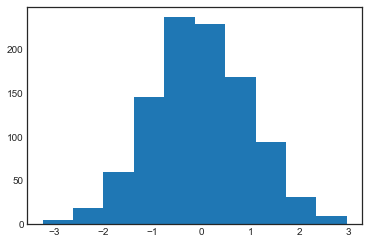

In [2]:
plt.hist(data);

> The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

`hist()`函數有很多的參數可以用來調整運算和展示；下面又一個更加個性化的直方圖展示：

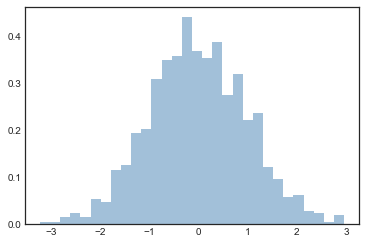

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

> The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

`plt.hist`文檔中有更多關於個性化參數的信息。作者發現聯合使用`histtype='stepfilled'`和`alpha`參數設置透明度在對不同分佈的數據集進行比較展示時很有用：

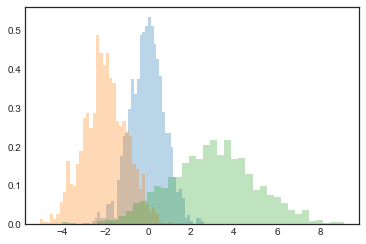

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

> If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

如果你只是需要計算直方圖的數值（即每個桶的數據點數量）而不是展示圖像，`np.histogram()`函數可以完成這個目標：

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 24 206 466 263  41]


## Two-Dimensional Histograms and Binnings

## 二維直方圖和分桶

> Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

正如前面我們可以在一維上使用數值對應的直線劃分桶一樣，我們也可以在二維上使用數據對應的點來劃分桶。本節我們介紹幾種實現的方法。首先定義數據集，從多元高斯分佈中獲得`x`和`y`數組：

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

### `plt.hist2d`：二維直方圖

> One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

繪製二維直方圖最直接的方法是使用Matplotlib的`plt.hist2d`函數：

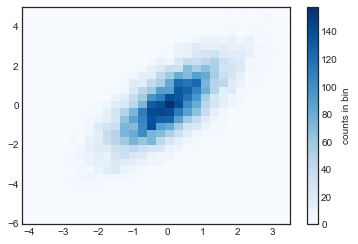

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

> Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

類似`plt.hist`，`plt.hist2d`有許多額外的參數來調整分桶計算和圖表展示，可以通過文檔了解更多信息。而且，`plt.hist`有`np.histogram`，`plt.hist2d`也有其對應的函數`np.histogram2d`。如下例：

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### ``plt.hexbin``: Hexagonal binnings

### ``plt.hexbin`：六角形分桶

> The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

剛才的二維分桶是沿著坐標軸將每個桶分為正方形。另一個很自然的分桶形狀就是正六邊形。對於這個需求，Matplotlib提供了`plt.hexbin`函數，它也是在二維平面上分桶展示，不過每個桶（即圖表上的每個數據格）將會是六邊形：

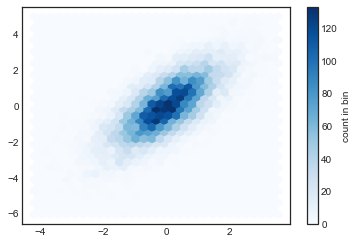

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

### 核密度估計

> Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now we'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.
Here is a quick example of using the KDE on this data:

另外一個常用來統計多維數據密度的工具是*核密度估計*（KDE）。這部分內容將在[深入：核密度估計](05.13-Kernel-Density-Estimation.ipynb)一節中詳細介紹。目前我們只需要知道KDE被認為是一種可以用來填補數據的空隙並補充上平滑變化數據的方法就足夠了。快速和簡單的KDE算法已經在`scipy.stats`模塊中有了成熟的實現。下面我們就一個簡單的例子來說明如何使用KDE和繪製相應的二維直方圖：

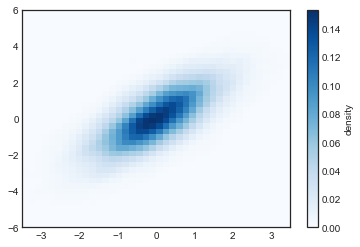

In [10]:
from scipy.stats import gaussian_kde

# 產生和處理數據，初始化KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的網格中計算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 將圖表繪製成一張圖像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

> KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast: ``gaussian_kde`` uses a rule-of-thumb to attempt to find a nearly optimal smoothing length for the input data.

KDE有著光滑的長度，可以在細節和光滑度中有效的進行調節（一個例子是方差偏差權衡）。這方面有大量的文獻介紹：高斯核密度估計`gaussian_kde`使用了經驗法則來尋找輸入數據附近的優化光滑長度值。

> Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, ``sklearn.neighbors.KernelDensity`` and ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more terse API for creating KDE-based visualizations.

其他的KDE實現也可以在SciPy中找到，每一種都有它的優點和缺點；參見``sklearn.neighbors.KernelDensity``和``statsmodels.nonparametric.kernel_density.KDEMultivariate``。要繪製基於KDE進行可視化的圖表，Matplotlib寫出的代碼會比較冗長。我們將在[使用Seaborn進行可視化](04.14-Visualization-With-Seaborn.ipynb)一節中介紹Seaborn庫，它提供了更加簡潔的方式用來繪製KDE圖表。

<!--NAVIGATION-->
< [密度和轮廓图](04.04-Density-and-Contour-Plots.ipynb) | [目录](Index.ipynb) | [自定义图表图例](04.06-Customizing-Legends.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.05-Histograms-and-Binnings.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
